In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

In [12]:
# sources = [
#     ('2021-06-11_11-28-48-simple.json', '0 '),
#     ('2021-06-11_11-30-31-sat-nothing.json', '1 nothing '),
#     ('2021-06-11_11-46-34-sat-clause.json', '2 clause '),
#     ('2021-06-11_11-56-15-sat-pair.json', '3 pair '),
#     ('2021-06-11_12-08-44-sat-clause-pair.json', '4 clause+pair '),
# ]

sources = [('2022-02-15_22-22-23.json', '0 ')]

dfs = []
for path, name in sources:
    with open(path) as file:
        df = pd.DataFrame(json.load(file)['benchmarks'])
    df[['problem', 'solver']] = df.name.str.split('@', expand=True)
#     df.problem = df.problem.str.split('/').apply(lambda x: x[-1])
    df.solver = name + df.solver
    dfs.append(df)
df = pd.concat(dfs).pivot('problem', 'solver', 'cpu_time')

In [34]:
def color(vmin, vmax, val):
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    rgba = mpl.cm.Oranges(norm(val))
    bg = mpl.colors.rgb2hex(rgba[:3])
    return f'width: 6em; background-color: {bg}'


def gmean(xs):
    return np.exp(np.log(xs).mean())


def show(df, regex, sort_by, show_gmeans):
    dmin, dmax = df.min().min(), df.max().max()
    df = df.filter(regex=regex)
    print(df)
    if sort_by is not None:
        df = df.sort_values(sort_by)
    
    dt = df.transpose()
    dt['gmean'] = df.apply(gmean)
    table = dt.style.applymap(partial(color, dmin, dmax)).set_precision(2)

    df.plot(figsize=(16, 10), style='o-', grid=True, logy=True)
    plt.xticks(range(len(df)), df.index)
    plt.yticks([10**i for i in range(-20, 20)])
    plt.ylim(dmin/2, dmax*2)
    
    if show_gmeans:
        plt.figure(figsize=(12, 4))
        dt['gmean'].sort_values()[::-1].plot(kind='barh', logx=True)

    return table

In [35]:
sort_by = '0 simple'

solver                             0 simple
problem                                    
problems/1/01x04_s                 0.002579
problems/1/01x05_s                 0.004827
problems/1/01x06_s                 0.005350
problems/1/01x07_s                 0.003381
problems/1/01x08_s                 0.004118
...                                     ...
problems/mixed-tiles/3I-1-05x05_s  0.006242
problems/mixed-tiles/3I-1-07x07_s  0.009488
problems/mixed-tiles/3I-1-08x08_s  0.014597
problems/mixed-tiles/3I-1-10x10_s  0.021831
problems/mixed-tiles/3I-1-11x11_s  0.028345

[160 rows x 1 columns]


/tmp/ipykernel_237411/2180384847.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  table = dt.style.applymap(partial(color, dmin, dmax)).set_precision(2)


problem,problems/3I/L-02x04_u,problems/4O/05x10_u,problems/2/01x04_s,problems/3I/L-02x07_u,problems/4O/05x12_u,problems/2/02x04_s,problems/3I/03x04_s,problems/4O/05x14_u,problems/1/01x04_s,problems/2/01x06_s,problems/4O/05x16_u,problems/4O/05x18_u,problems/4O/02x08_s,problems/1/02x04_s,problems/4O/05x20_u,problems/2/01x08_s,problems/4O/05x22_u,problems/1/01x07_s,problems/3I/03x06_s,problems/2/04x04_s,problems/3I/L-02x10_u,problems/mixed-tiles/3I-1-04x04_s,problems/3L/03x04_s,problems/4O/05x24_u,problems/2/corners-4x4_u,problems/mixed-tiles/1-3I-04x04_s,problems/2/02x06_s,problems/2/01x10_s,problems/4O/02x10_s,problems/2/02x08_s,problems/1/01x08_s,problems/3I/03x08_s,problems/3I/L-02x13_u,problems/1/01x09_s,problems/1/02x05_s,problems/1/02x06_s,problems/2/01x12_s,problems/1/01x10_s,problems/1/01x05_s,problems/3L/03x06_s,problems/4O/02x12_s,problems/1/02x07_s,problems/2/02x10_s,problems/4O/04x08_s,problems/4O/02x14_s,problems/1/01x11_s,problems/3I/03x10_s,problems/1/01x06_s,problems/1/04x04_s,problems/1/02x08_s,problems/2/02x12_s,problems/3L/03x08_s,problems/3I/05x06_s,problems/2/01x14_s,problems/3I/03x12_s,problems/1/01x12_s,problems/3L/L-02x04_u,problems/mixed-tiles/3I-1-05x05_s,problems/3I/L-02x16_u,problems/4O/02x16_s,problems/2/02x14_s,problems/4O/04x10_s,problems/4I/06x06_u,problems/3I/03x14_s,problems/3I/L-02x19_u,problems/4O/02x18_s,problems/2/02x16_s,problems/misc/01_s,problems/2/01x18_s,problems/3L/05x06_s,problems/2/01x16_s,problems/4O/04x12_s,problems/4O/02x20_s,problems/3L/03x10_s,problems/1/02x09_s,problems/misc/01'_s,problems/3I/03x16_s,problems/4O/04x14_s,problems/2/06x06_s,problems/3I/L-02x22_u,problems/4O/02x22_s,problems/4O/08x08_s,problems/4O/02x24_s,problems/2/01x20_s,problems/1/02x10_s,problems/3L/03x12_s,problems/4O/04x16_s,problems/3L/03x14_s,problems/mixed-tiles/1-3I-07x07_s,problems/mixed-tiles/3I-1-07x07_s,problems/3I/03x18_s,problems/2/02x18_s,problems/3L/L-02x07_u,problems/3I/05x09_s,problems/3L/03x16_s,problems/1/05x05_s,problems/1/02x12_s,problems/2/02x20_s,problems/1/02x11_s,problems/mixed-tiles/1-3I-05x05_s,problems/3I/03x20_s,problems/4O/04x18_s,problems/2/08x08_s,problems/3I/05x12_s,problems/misc/02_u,problems/mixed-tiles/3I-1-08x08_s,problems/3L/03x18_s,problems/misc/02'_s,problems/3L/05x09_s,problems/4O/04x20_s,problems/3L/05x12_s,problems/3L/03x20_s,problems/4O/04x22_s,problems/1/06x06_s,problems/3I/05x15_s,problems/4O/10x10_s,problems/4O/04x24_s,problems/1/07x07_s,problems/3I/05x18_s,problems/mixed-tiles/3I-1-10x10_s,problems/mixed-tiles/1-3I-10x10_s,problems/3L/05x15_s,problems/2/10x10_s,problems/1/08x08_s,problems/3L/05x18_s,problems/mixed-tiles/3I-1-11x11_s,problems/3I/05x21_s,problems/4O/12x12_s,problems/3L/L-02x10_u,problems/4O/14x14_s,problems/1/09x09_s,problems/2/12x12_s,problems/4O/16x16_s,problems/1/10x10_s,problems/1/11x11_s,problems/2/14x14_s,problems/2/16x16_s,problems/3L/05x21_s,problems/4O/18x18_s,problems/misc/03_s,problems/4O/20x20_s,problems/1/12x12_s,problems/4O/22x22_s,problems/2/18x18_s,problems/misc/5Q-4L-plus-03_s,problems/4O/24x24_s,problems/2/20x20_s,problems/3L/L-02x13_u,problems/2/corners-6x6_u,problems/3L/L-02x16_u,problems/misc/3L-4J-10x14_s,problems/many-unique-tiles/5x18_s,problems/mixed-tiles/1-3I-08x08_s,problems/4I/10x10_u,problems/many-unique-tiles/complex-01_s,problems/3L/L-02x19_u,problems/3L/L-02x22_u,problems/many-unique-tiles/complex-02_s,problems/many-unique-tiles/3x42_s,problems/mixed-tiles/1-3I-11x11_s,gmean
solver,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0 simple,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01

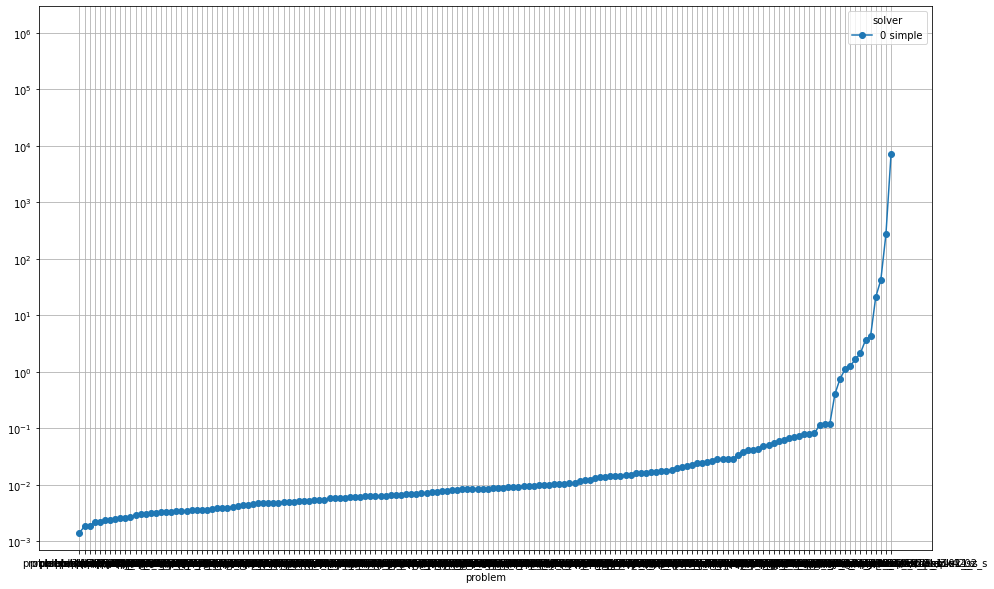

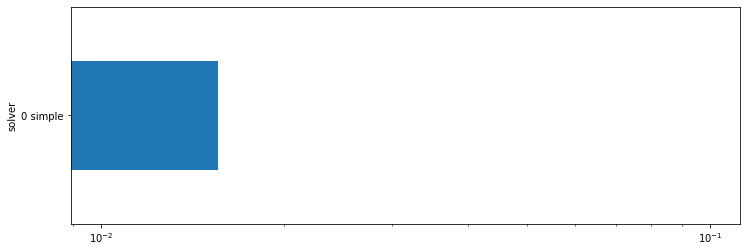

In [43]:
show(df, 'p', sort_by, True)

problem,01,09,02,04,03,10,06,05,08,07,gmean
solver,,,,,,,,,,,
0 simple,0.00,0.00,0.02,0.06,0.08,0.36,1.21,2.79,264.37,2349.60,0.48
1 nothing cadical,0.09,12.55,24.11,15175.65,24.21,13835.29,1929.34,150839.08,33709.59,12730.36,669.06
2 clause cadical,0.10,35.92,34.98,1969.09,57.17,15296.69,1886.13,13159.42,12552.83,9323.32,480.50
3 pair cadical,0.09,23.82,26.57,18195.39,436.58,29017.65,2338.21,23635.94,13637.74,12986.38,812.16
4 clause+pair cadical,0.09,46.76,34.69,4149.88,54.31,34016.36,652.99,5973.38,40121.33,8174.92,519.14


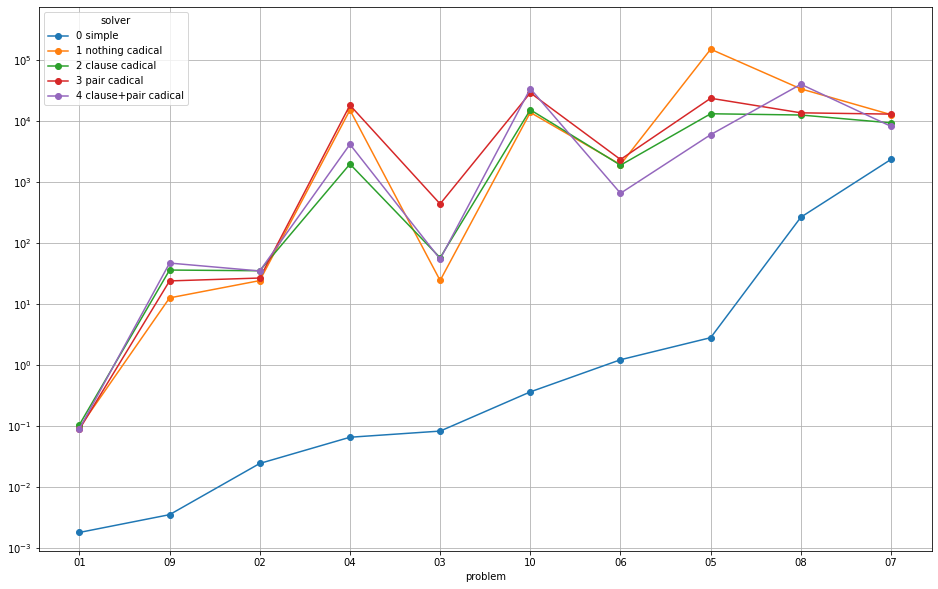

In [6]:
show(df, 'simple|cadical', sort_by, False)

problem,01,09,02,04,03,10,06,05,08,07,gmean
solver,,,,,,,,,,,
0 simple,0.00,0.00,0.02,0.06,0.08,0.36,1.21,2.79,264.37,2349.60,0.48
1 nothing cmsat,0.41,64.92,22.55,21172.33,6.38,88335.54,92159.14,368511.88,77391.29,24745.85,1846.17
2 clause cmsat,0.45,37.19,31.80,354.40,40.25,95199.90,592.45,194.44,87991.32,28653.36,428.98
3 pair cmsat,0.40,39.05,21.64,54299.82,35.09,93422.59,46500.06,111967.58,219855.03,416.64,1398.23
4 clause+pair cmsat,0.41,66.11,30.94,3032.89,10.95,115176.39,1203.00,5694.12,185220.75,14835.59,754.92


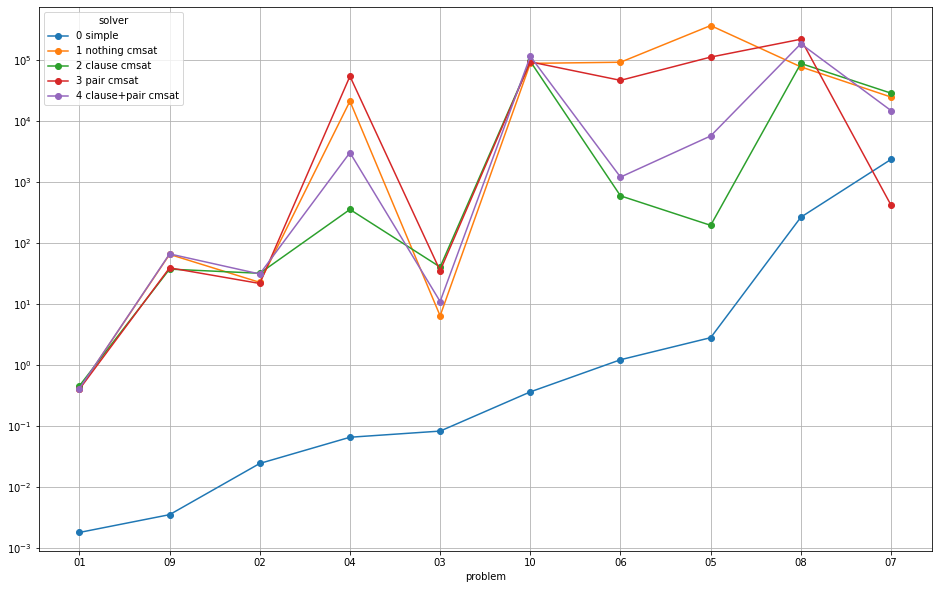

In [7]:
show(df, 'simple|cmsat', sort_by, False)